In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 Importing Datasets

In [3]:
order_details = pd.read_csv('/content/OrderDetails.csv')
cooking_sessions = pd.read_csv('/content/CookingSessions.csv')
user_details = pd.read_csv('/content/UserDetails.csv')

Exploring datasets


In [4]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [11]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      16 non-null     int64  
 1   User ID       16 non-null     object 
 2   Order Date    16 non-null     object 
 3   Meal Type     16 non-null     object 
 4   Dish Name     16 non-null     object 
 5   Order Status  16 non-null     object 
 6   Amount (USD)  16 non-null     float64
 7   Time of Day   16 non-null     object 
 8   Rating        14 non-null     float64
 9   Session ID    16 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ KB


In [19]:
# there are 2 null values in rating column
order_details.isnull().sum()

,0
Order ID,0
User ID,0
Order Date,0
Meal Type,0
Dish Name,0
Order Status,0
Amount (USD),0
Time of Day,0
Rating,2
Session ID,0


In [20]:
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)

<ipython-input-20-1bd53fa3365b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


In [21]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      16 non-null     int64  
 1   User ID       16 non-null     object 
 2   Order Date    16 non-null     object 
 3   Meal Type     16 non-null     object 
 4   Dish Name     16 non-null     object 
 5   Order Status  16 non-null     object 
 6   Amount (USD)  16 non-null     float64
 7   Time of Day   16 non-null     object 
 8   Rating        16 non-null     float64
 9   Session ID    16 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ KB


***The null values removed and filled with the mean value of Ratings.***

In [12]:
order_details.describe()

,Order ID,Amount (USD),Rating
count,16.000000,16.000000,14.000000
mean,1008.500000,11.250000,4.285714
std,4.760952,2.435843,0.468807
min,1001.000000,7.000000,4.000000
25%,1004.750000,9.000000,4.000000
50%,1008.500000,11.500000,4.000000
75%,1012.250000,13.125000,4.750000
max,1016.000000,15.000000,5.000000


In [13]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [14]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            10 non-null     object
 1   User Name          10 non-null     object
 2   Age                10 non-null     int64 
 3   Location           10 non-null     object
 4   Registration Date  10 non-null     object
 5   Phone              10 non-null     object
 6   Email              10 non-null     object
 7   Favorite Meal      10 non-null     object
 8   Total Orders       10 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 848.0+ bytes


In [15]:
user_details.describe()

,Age,Total Orders
count,10.000000,10.000000
mean,31.800000,9.400000
std,5.266245,3.339993
min,25.000000,5.000000
25%,28.250000,7.250000
50%,30.500000,8.500000
75%,34.500000,11.500000
max,42.000000,15.000000


In [16]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [17]:
cooking_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Session ID       16 non-null     object 
 1   User ID          16 non-null     object 
 2   Dish Name        16 non-null     object 
 3   Meal Type        16 non-null     object 
 4   Session Start    16 non-null     object 
 5   Session End      16 non-null     object 
 6   Duration (mins)  16 non-null     int64  
 7   Session Rating   16 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


In [18]:
cooking_sessions.describe()

,Duration (mins),Session Rating
count,16.000000,16.000000
mean,30.312500,4.518750
std,10.873324,0.292617
min,10.000000,4.000000
25%,20.000000,4.300000
50%,30.000000,4.550000
75%,40.000000,4.725000
max,45.000000,5.000000


# **User Behavior Analysis**

1. Frequency of Orders

In [41]:
order_frequency = order_details.groupby('User ID')['Order ID'].count().reset_index()
order_frequency.rename(columns={'Order ID':'Frequency'}, inplace=True)
order_frequency

,User ID,Frequency
0,U001,3
1,U002,3
2,U003,3
3,U004,2
4,U005,2
5,U006,1
6,U007,1
7,U008,1


***This is the table for the users and their frequency of orders***

<Axes: xlabel='User ID', ylabel='Frequency'>

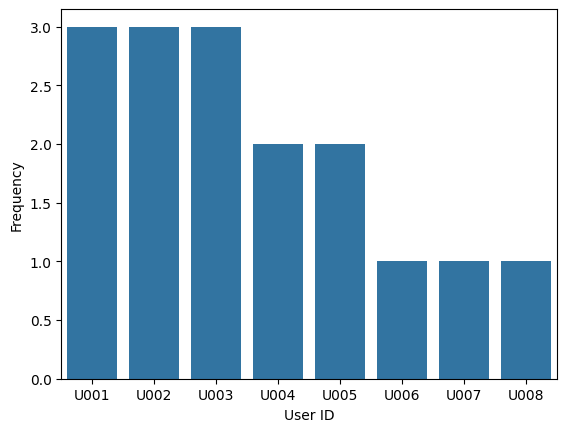

In [45]:
sns.barplot(x='User ID', y='Frequency', data=order_frequency)

2. Popular Cooking Styles

In [55]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [59]:
cooking_dish_popularity = cooking_sessions.groupby('Dish Name')['Session ID'].count().reset_index()
cooking_dish_popularity.rename(columns={'Session ID': 'Frequency'}, inplace=True)
cooking_dish_popularity.sort_index()

,Dish Name,Frequency
0,Caesar Salad,3
1,Grilled Chicken,4
2,Oatmeal,1
3,Pancakes,2
4,Spaghetti,4
5,Veggie Burger,2


<Axes: xlabel='Dish Name', ylabel='Frequency'>

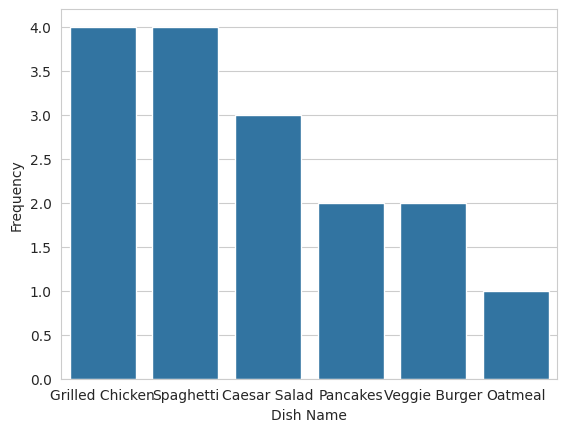

In [51]:
sns.barplot(x='Dish Name', y='Frequency', data=cooking_dish_popularity)

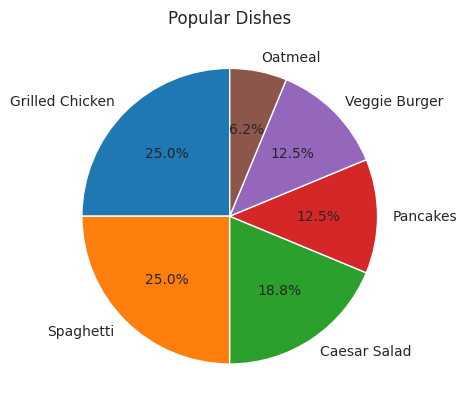

In [54]:
plt.pie(cooking_dish_popularity['Frequency'], labels=cooking_dish_popularity['Dish Name'],autopct='%1.1f%%', startangle=90)
plt.title('Popular Dishes')
plt.show()

These above are the visualisations for the Popular cooked dishes.

---
**Pie Chart** shows the percentage of the popular dishes.
**Bar Chart** shows the frequency of the dishes.


<Axes: xlabel='Meal Type', ylabel='Duration (mins)'>

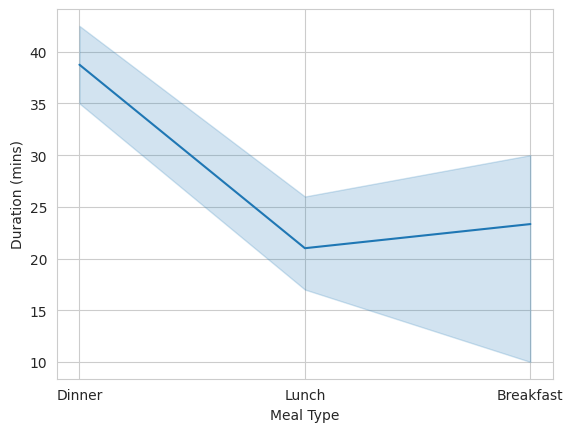

In [57]:
sns.lineplot(y='Duration (mins)', x='Meal Type', data=cooking_sessions)

***The line plot shows the Duration of consuming dishes at different meal types.***

In [63]:
time_spent_on_meal = cooking_sessions.groupby('Meal Type')['Duration (mins)'].sum()
time_spent_on_meal

,Duration (mins)
Meal Type,
Breakfast,70
Dinner,310
Lunch,105


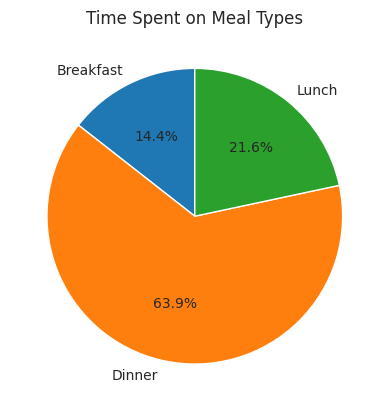

In [66]:
plt.pie(time_spent_on_meal, labels=time_spent_on_meal.index, autopct='%0.1f%%', startangle=90)
plt.title('Time Spent on Meal Types')
plt.show()

***The major time is spent on dinner.***

# **Merging**

In [68]:
user_orders = pd.merge(user_details, order_details, on='User ID')

In [70]:
user_orders.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Order ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006


In [77]:
total_user_orders = user_orders.groupby('User Name')['Total Orders'].sum().reset_index()
total_user_orders

,User Name,Total Orders
0,Alice Johnson,36
1,Bob Smith,24
2,Charlie Lee,45
3,David Brown,20
4,Emma White,18
5,Frank Green,7
6,Grace King,14
7,Henry Lee,5


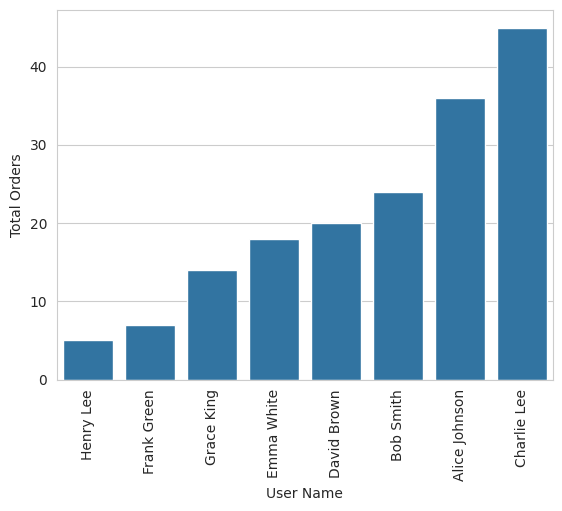

In [83]:
sns.barplot(data=total_user_orders.sort_values(by='Total Orders'), x='User Name', y='Total Orders')
plt.xticks(rotation=90)
plt.show()

*** The bar chart shows the Total number of orders by each user***

In [89]:
orders_by_locations = user_orders.groupby('Location')['Order ID'].sum().reset_index()
orders_by_locations

,Location,Order ID
0,Austin,1014
1,Boston,1015
2,Chicago,3022
3,Los Angeles,3018
4,Miami,1016
5,New York,3014
6,San Francisco,2017
7,Seattle,2020


<Axes: xlabel='Location', ylabel='Order ID'>

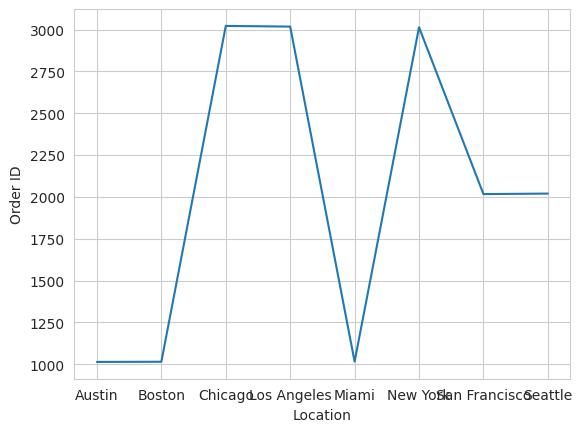

In [90]:
sns.lineplot(data=orders_by_locations, x='Location', y='Order ID')

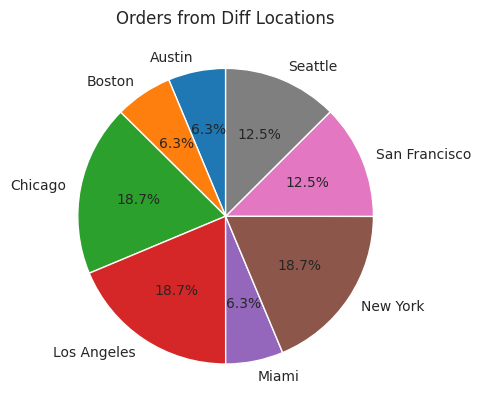

In [94]:
plt.pie(orders_by_locations['Order ID'], labels=orders_by_locations['Location'], autopct='%0.1f%%', startangle=90)
plt.title('Orders from Diff Locations')
plt.show()

***The above visualisation shows the percentage of orders from differant locations***

In [95]:
total_user_orders = user_orders.groupby('User Name')['Amount (USD)'].sum().reset_index()
total_user_orders

,User Name,Amount (USD)
0,Alice Johnson,35.0
1,Bob Smith,31.0
2,Charlie Lee,32.0
3,David Brown,21.5
4,Emma White,22.5
5,Frank Green,13.0
6,Grace King,14.0
7,Henry Lee,11.0


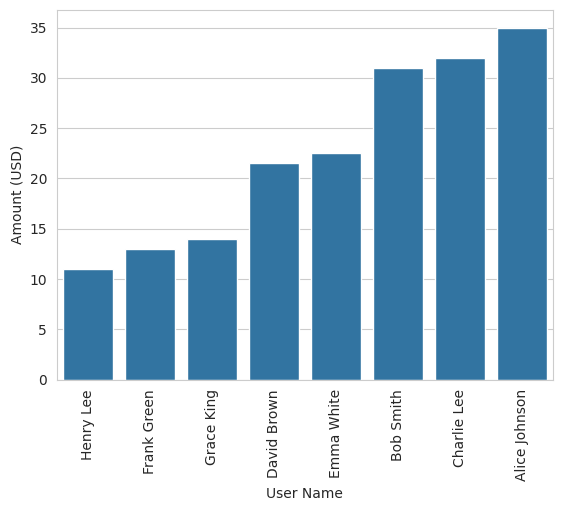

In [96]:
sns.barplot(data=total_user_orders.sort_values(by='Amount (USD)'), x='User Name', y='Amount (USD)')
plt.xticks(rotation=90)
plt.show()

***The bar chart shows the total amount spent by each user***

# Merging data

In [104]:
merged_data = pd.merge(order_details, user_details, on='User ID', how='left')
final_data = pd.merge(merged_data, cooking_sessions, on=['User ID', 'Session ID'], how='inner')

In [105]:
final_data.head()

,Order ID,User ID,Order Date,Meal Type_x,Dish Name_x,Order Status,Amount (USD),Time of Day,Rating,Session ID,...,Phone,Email,Favorite Meal,Total Orders,Dish Name_y,Meal Type_y,Session Start,Session End,Duration (mins),Session Rating
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001,...,123-456-7890,alice@email.com,Dinner,12,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000,S002,...,987-654-3210,bob@email.com,Lunch,8,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714,S003,...,555-123-4567,charlie@email.com,Breakfast,15,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004,...,123-456-7890,alice@email.com,Dinner,12,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000,S005,...,444-333-2222,david@email.com,Dinner,10,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [116]:
demographic_influence = final_data.groupby(['Age','Location'])['Amount (USD)'].sum().reset_index()
demographic_influence.sort_values(by='Amount (USD)', ascending=False)

,Age,Location,Amount (USD)
2,28,New York,35.0
7,42,Chicago,32.0
5,35,Los Angeles,31.0
3,30,Seattle,22.5
1,27,San Francisco,21.5
6,38,Boston,14.0
0,25,Austin,13.0
4,31,Miami,11.0


<Axes: xlabel='Age', ylabel='Amount (USD)'>

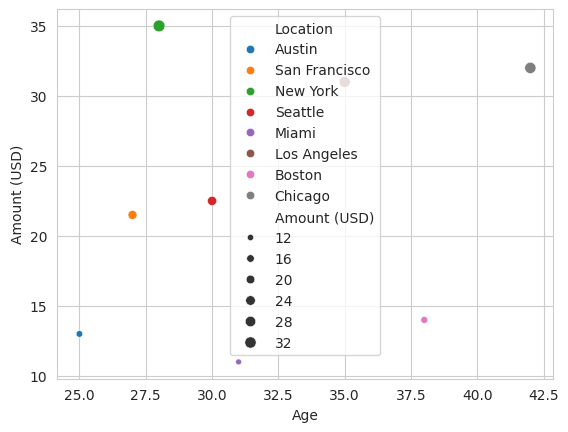

In [122]:
sns.scatterplot(data=demographic_influence, x='Age', y='Amount (USD)', hue='Location', size='Amount (USD)')

***The people of age group lives in cities like New York, Los Angeles and Chicago spent more money on food.***